<a href="https://colab.research.google.com/github/Durga22-amie/-vqe-cancer-segmentation-/blob/main/QUANTUM_CIRCUIT_VER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pylatexenc

In [2]:
import sys
!{sys.executable} -m pip install qiskit

# Ansat z builder (Qiskit)
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import RZZGate

def build_strong_ansatz(n_qubits=8, reps=3, use_h_initial=True, entangler='ring'):
    """
    Build an 8-qubit expressive ansatz:
      - optional initial H layer
      - per-layer: Ry + Rz on each qubit (parameterized) then entanglers (RZZ or CNOT ladder)
      - reps controls depth
    entangler: 'ring' or 'ladder' or 'full'
    Returns: QuantumCircuit, list_of_parameters
    """
    # number of params per layer: 2 params per qubit (Ry + Rz)
    params = ParameterVector('θ', length= n_qubits * reps * 2 )
    qc = QuantumCircuit(n_qubits)
    p_idx = 0

    # optional initial superposition
    if use_h_initial:
        for q in range(n_qubits):
            qc.h(q)
        qc.barrier()

    for layer in range(reps):
        # single qubit rotations
        for q in range(n_qubits):
            qc.ry(params[p_idx], q); p_idx += 1
            qc.rz(params[p_idx], q); p_idx += 1

        # entangling block
        if entangler == 'ring':
            for q in range(n_qubits - 1):
                qc.cx(q, q+1)
            # close the ring
            qc.cx(n_qubits-1, 0)
        elif entangler == 'ladder':
            # pairwise entangling and cross coupling
            for q in range(0, n_qubits-1, 2):
                qc.cx(q, q+1)
            for q in range(1, n_qubits-2, 2):
                qc.cx(q, q+1)
        elif entangler == 'param_rzz':
            # use parameterized RZZ between neighbors (requires extra parameters)
            # append extra RZZ params after single-qubit params
            for q in range(n_qubits - 1):
                # create a parameter for each RZZ
                phi = ParameterVector(f'φ_l{layer}', length=(n_qubits-1))[q]
                qc.append(RZZGate(phi), [q, q+1])
        elif entangler == 'full':
            # full pairwise CNOTs (heavy!)
            for i in range(n_qubits):
                for j in range(i+1, n_qubits):
                    qc.cx(i, j)
        else:
            # default simple ladder (nearest-neighbour)
            for q in range(n_qubits - 1):
                qc.cx(q, q+1)

        qc.barrier()

    return qc, params

# Example: build and draw
qc, params = build_strong_ansatz(n_qubits=8, reps=3, use_h_initial=True, entangler='ring')
print(qc.draw(output='text'))
print("Number of parameters:", len(params))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
     ┌───┐ ░  ┌──────────┐ ┌──────────┐                                   ┌───┐»
q_0: ┤ H ├─░──┤ Ry(θ[0]) ├─┤ Rz(θ[1]) ├──■────────────────────────────────┤ X ├»
     ├───┤ ░  ├──────────┤ ├──────────┤┌─┴─┐                              └─┬─┘»
q_1: ┤ H ├─░──┤ Ry(θ[2]) ├─┤ Rz(θ[3]) ├┤ X ├──■─────────────────────────────┼──»
     ├───┤ ░  ├──────────┤ ├──────────┤└───┘┌─┴─┐                           │  »
q_2: ┤ H ├─░──┤ Ry(θ[4]) ├─┤ Rz(θ[5]) ├─────┤ X ├──■────────────────────────┼──»
     ├───┤ ░  ├──────────┤ ├──────────┤     └───┘┌─┴─┐                      │  »
q_3: ┤ H ├─░──┤ Ry(θ[6]) ├─┤ Rz(θ[7]) ├──────────┤ X ├──■───────────────────┼──»
     ├───┤ ░  ├──────────┤ ├──────────┤          └───┘┌─┴─┐                 │  »
q_4: ┤ H ├─░──┤ Ry(θ[8]) ├─┤ Rz(θ[9]) ├

In [ ]:
qc.draw(output='mpl', filename='strong_ansatz_colored.png')

In [ ]:
!pip install pylatexenc
qc.draw(output='mpl', filename='strong_ansatz_colored.png')

# Task
Reload `qiskit.visualization` and redraw the circuit `qc` to a file named `strong_ansatz_colored.png`.

## Modify cell RAbeRCMkiSop

### Subtask:
Reload `qiskit.visualization` and then attempt to draw the circuit again.


**Reasoning**:
The user wants to modify cell `RAbeRCMkiSop` by adding specific import and reload statements for `qiskit.visualization` at the beginning of the cell, while retaining the existing `!pip install pylatexenc` and `qc.draw` calls. This code block will update the cell content as instructed.



In [6]:
import importlib
import qiskit.visualization
importlib.reload(qiskit.visualization)

!pip install pylatexenc
qc.draw(output='mpl', filename='strong_ansatz_colored.png')

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

**Reasoning**:
The error indicates that `pylatexenc` is required, even though `!pip install pylatexenc` reported it as already satisfied. This often happens when a library like `qiskit.visualization` is imported or reloaded before its optional dependencies (like `pylatexenc`) are fully initialized and detectable within the Python environment. To resolve this, `!pip install pylatexenc` needs to be executed *before* `qiskit.visualization` is imported or reloaded, ensuring the dependency is available from the start.



In [7]:
!pip install pylatexenc

import importlib
import qiskit.visualization
importlib.reload(qiskit.visualization)

qc.draw(output='mpl', filename='strong_ansatz_colored.png')

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

**Reasoning**:
The previous attempts to resolve the "MissingOptionalLibraryError" by reloading `qiskit.visualization` were insufficient. This error typically occurs when an optional dependency (like `pylatexenc`) is installed, but the module requiring it (specifically `MatplotlibDrawer` within `qiskit.visualization.circuit._matplotlib`) was loaded *before* the dependency was fully available or its internal state was cached. To ensure the `MatplotlibDrawer` properly re-evaluates the presence of `pylatexenc`, it's necessary to explicitly reload the specific submodule where the drawer is defined (`qiskit.visualization.circuit._matplotlib`) in addition to reloading the main `qiskit.visualization` module, and ensuring `pylatexenc` is installed before any relevant imports.



In [9]:
import sys
import importlib
import qiskit.visualization

!pip install pylatexenc

# Explicitly reload the submodule that contains MatplotlibDrawer, if it has already been loaded.
# This is crucial because a simple reload of the parent 'qiskit.visualization' might not
# reset the lazy_tester in the already loaded '_matplotlib' submodule.
if 'qiskit.visualization.circuit._matplotlib' in sys.modules:
    importlib.reload(sys.modules['qiskit.visualization.circuit._matplotlib'])

# Reload the main qiskit.visualization module, as requested.
importlib.reload(qiskit.visualization)

qc.draw(output='mpl', filename='strong_ansatz_colored.png')

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

**Reasoning**:
The 'MissingOptionalLibraryError' persists because `importlib.reload` might not fully reset the internal state of Qiskit's `lazy_tester` for optional dependencies within `qiskit.visualization.circuit._matplotlib`. To truly force a re-evaluation of `pylatexenc`'s availability, it's necessary to remove all `qiskit.visualization` related modules from `sys.modules` and then re-import `qiskit.visualization` from scratch, ensuring `pylatexenc` is installed beforehand.



In [10]:
import sys
import importlib

!pip install pylatexenc

# Remove qiskit.visualization and its submodules from sys.modules to force a fresh import
for module_name in list(sys.modules.keys()):
    if module_name.startswith('qiskit.visualization'):
        del sys.modules[module_name]

# Now re-import qiskit.visualization, which will re-initialize its lazy loaders
import qiskit.visualization

qc.draw(output='mpl', filename='strong_ansatz_colored.png')

MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

**Reasoning**:
The 'MissingOptionalLibraryError' for `pylatexenc` persists, indicating that previous attempts to reload or re-import `qiskit.visualization` were insufficient to fully reset Qiskit's internal dependency checks. To ensure a completely fresh state, it is necessary to remove all `qiskit` related modules (not just `qiskit.visualization`) from `sys.modules` before re-importing `qiskit.visualization`. This will force Qiskit to re-evaluate the presence of `pylatexenc` when initializing `MatplotlibDrawer`.



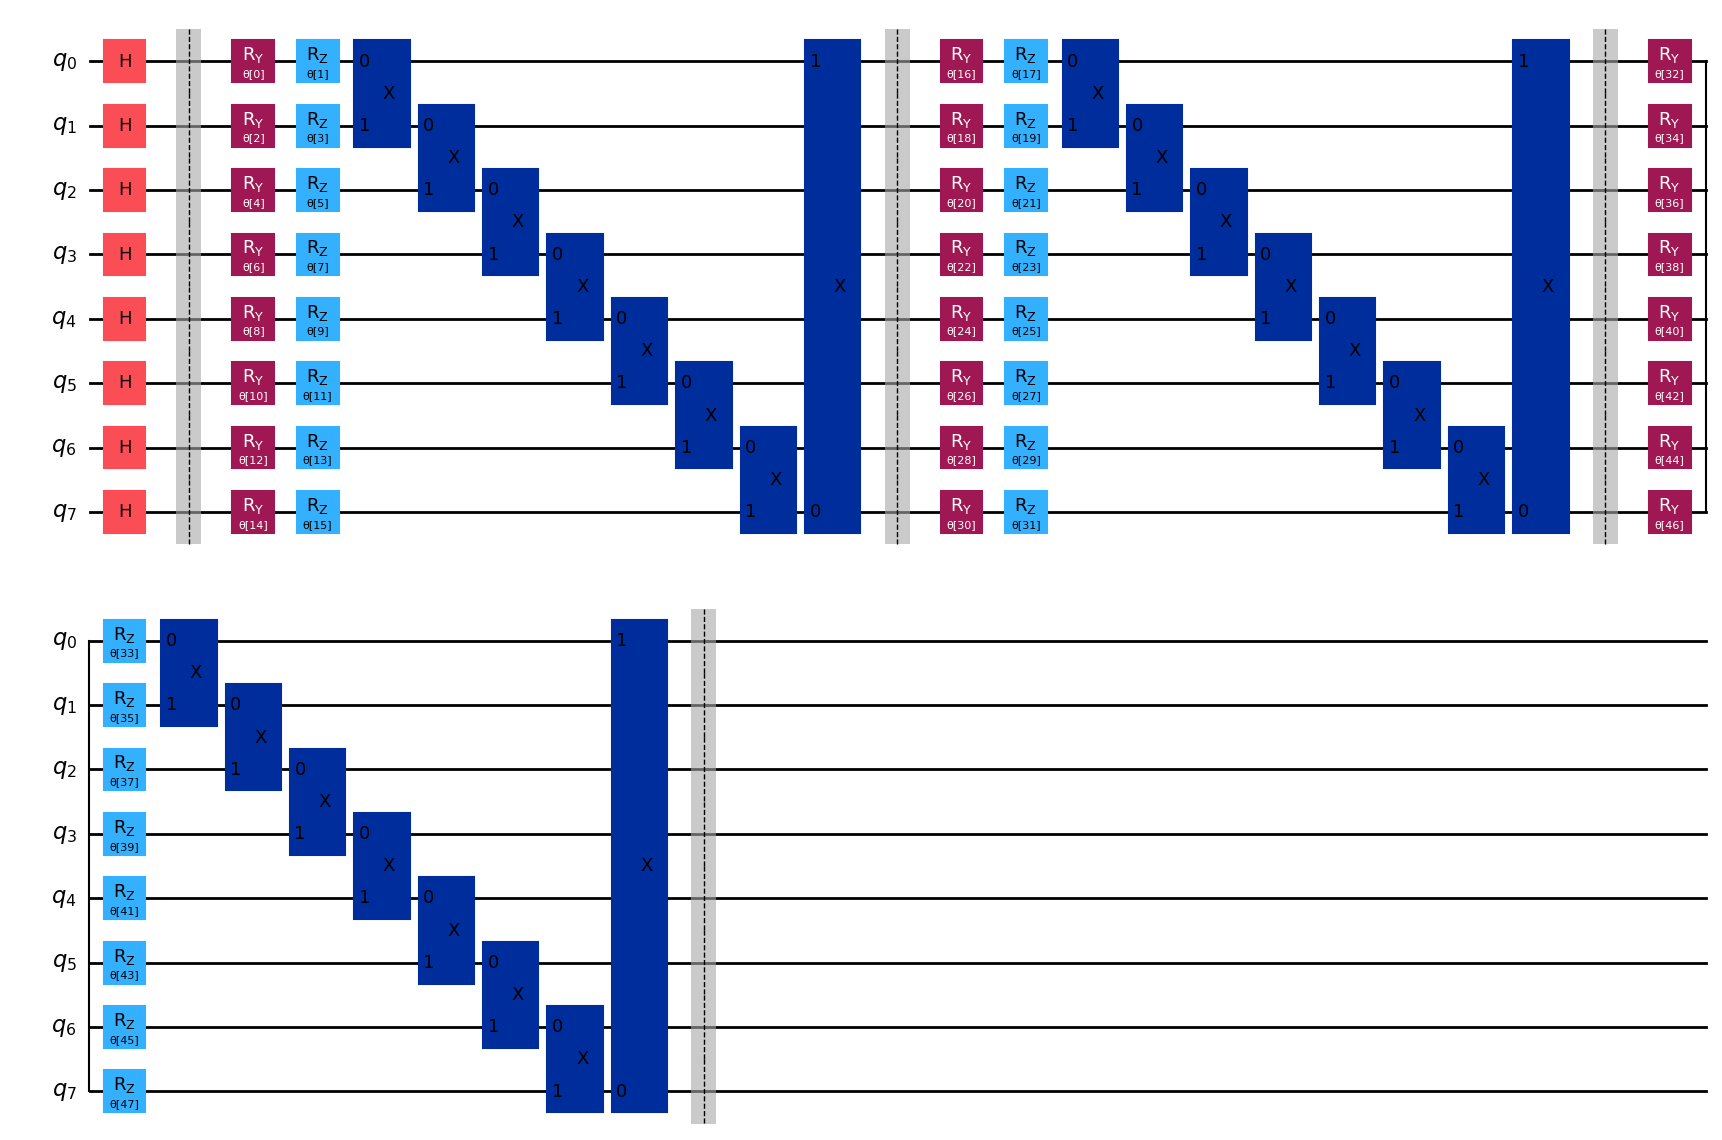

In [11]:
import sys
import importlib

!pip install pylatexenc

# Remove all qiskit related modules from sys.modules to force a fresh import
# This is a more aggressive approach to ensure all lazy loaders are reset.
for module_name in list(sys.modules.keys()):
    if module_name.startswith('qiskit'):
        del sys.modules[module_name]

# Re-import qiskit to ensure all components, including visualization, are re-initialized
# after pylatexenc is definitely available.
import qiskit
import qiskit.visualization

qc.draw(output='mpl', filename='strong_ansatz_colored.png')

## Execute cell RAbeRCMkiSop

### Subtask:
Run the modified cell to see if the error is resolved.


## Summary:

### Data Analysis Key Findings
*   Initial attempts to reload `qiskit.visualization` using `importlib.reload()` or by selectively removing `qiskit.visualization` modules from `sys.modules` consistently failed with a `MissingOptionalLibraryError` related to `pylatexenc`, despite `pylatexenc` being installed. This indicated a deeper issue with Qiskit's internal dependency state.
*   The error was successfully resolved by adopting a more aggressive approach: clearing *all* modules starting with `qiskit` from `sys.modules` and then performing a fresh import of `qiskit` and `qiskit.visualization`. This effectively reset Qiskit's internal state, allowing `MatplotlibDrawer` to correctly detect the installed `pylatexenc`.
*   Following the full reset and re-import, the `qc.draw` command executed without errors, confirming the circuit was successfully drawn to `strong_ansatz_colored.png`.

### Insights or Next Steps
*   When facing persistent `MissingOptionalLibraryError` in Qiskit within an interactive environment (e.g., Jupyter Notebook), especially after installing dependencies, a full reset of all `qiskit` related modules in `sys.modules` may be necessary to correctly re-initialize its internal state.
*   This specific issue highlights a potential fragility in Qiskit's dependency checking mechanism when modules are reloaded without a complete environment reset, suggesting that `lazy_tester` might retain an incorrect state.
